In [1]:
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F


from sklearn.preprocessing import LabelBinarizer, LabelEncoder,OneHotEncoder
import pickle as pl

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import os,copy,sys
import random
from sklearn.model_selection import train_test_split

from torch.utils.checkpoint import checkpoint as cp
from sklearn import svm,metrics
from sklearn.metrics import accuracy_score,f1_score

In [2]:
#import tensorflow as tf
import imageio as iio
import os
from PIL import Image

In [3]:
pip install tensorflow_addons

In [4]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow_addons as tfa
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [5]:
df_data=pd.read_csv('/content/drive/MyDrive/Advanced ML/Detecting Skin Lesions using Ensembles of Networks/Data files/2017/Metadata/ISIC2017_train_metadata_all.csv',index_col='Image')

In [87]:
df_val=pd.read_csv('/content/drive/MyDrive/Advanced ML/Detecting Skin Lesions using Ensembles of Networks/Data files/2017/Metadata/ISIC2017_val_metadata_all.csv',index_col='Image')

In [7]:
df_test=pd.read_csv('/content/drive/MyDrive/Advanced ML/Detecting Skin Lesions using Ensembles of Networks/Data files/2017/Metadata/ISIC2017_test_metadata_all.csv',index_col='Image')

In [8]:
df_data

,label,age_approximate,female,male,StdR,StdG,StdB,Correlation,Dissimilarity,Homogeneity,Energy,Contrast
Image,,,,,,,,,,,,
ISIC_0000000,0,0.651163,1.0,0.0,0.553980,0.747798,0.875936,0.999108,0.067882,0.526022,0.106056,0.010822
ISIC_0000001,0,0.360465,1.0,0.0,0.295992,0.375435,0.416619,0.990623,0.031359,0.684954,0.217888,0.004989
ISIC_0000002,1,0.709302,1.0,0.0,0.385240,0.509036,0.648620,0.987997,0.096129,0.351511,0.058628,0.015553
ISIC_0000003,0,0.360465,0.0,1.0,0.433831,0.633675,0.776980,0.995926,0.066921,0.625315,0.178721,0.014661
ISIC_0000004,1,0.941860,0.0,1.0,0.899873,0.755695,0.893868,0.995276,0.090622,0.817536,0.889078,0.034212
...,...,...,...,...,...,...,...,...,...,...,...,...
ISIC_0015220,2,0.883721,0.0,1.0,0.369845,0.329225,0.358388,0.958465,0.168283,0.193103,0.018435,0.044340
ISIC_0015233,2,0.709302,0.0,1.0,0.486629,0.338768,0.276574,0.930925,0.193347,0.167982,0.032084,0.082773
ISIC_0015260,2,0.651163,1.0,0.0,0.517080,0.536650,0.547321,0.964007,0.254536,0.109042,0.030214,0.086064


In [9]:
df_val

,label,age_approximate,female,male,StdR,StdG,StdB,Correlation,Dissimilarity,Homogeneity,Energy,Contrast
Image,,,,,,,,,,,,
ISIC_0001769,0,0.186047,1.0,0.0,0.592467,0.085954,0.167673,0.807590,0.216980,0.600970,0.563612,0.115781
ISIC_0001852,0,0.127907,1.0,0.0,0.166858,0.224722,0.283619,0.962958,0.022323,0.813279,0.823281,0.007715
ISIC_0001871,0,0.186047,0.0,1.0,0.795847,0.158630,0.437003,0.740943,0.270714,0.817531,0.837801,0.166944
ISIC_0003462,0,0.186047,1.0,0.0,0.770292,0.177174,0.429848,0.726336,0.319334,0.639948,0.563427,0.187798
ISIC_0003539,0,0.186047,1.0,0.0,0.173035,0.152924,0.185692,0.756258,0.241820,0.364561,0.466484,0.075890
...,...,...,...,...,...,...,...,...,...,...,...,...
ISIC_0015443,0,0.593023,1.0,0.0,0.212304,0.380583,0.473401,0.901107,0.304330,0.348744,0.187826,0.213207
ISIC_0015445,0,0.593023,1.0,0.0,0.623752,0.488009,0.387471,0.986685,0.218767,0.419314,0.156694,0.080767
ISIC_0015483,0,0.593023,0.0,1.0,0.551125,0.553153,0.492128,0.865602,0.707184,0.107741,0.056060,0.575881


In [10]:
df_test

,label,age_approximate,female,male,StdR,StdG,StdB,Correlation,Dissimilarity,Homogeneity,Energy,Contrast
Image,,,,,,,,,,,,
ISIC_0012086,2,0.360465,0.0,1.0,0.454405,0.279213,0.223899,0.924015,0.222811,0.383288,0.163600,0.140729
ISIC_0012092,0,0.476744,0.0,1.0,0.325840,0.310852,0.256664,0.867955,0.193068,0.497773,0.363604,0.106911
ISIC_0012095,0,0.302326,0.0,1.0,0.064197,0.092959,0.101909,0.712303,0.127949,0.669526,0.493378,0.083867
ISIC_0012134,2,0.883721,1.0,0.0,0.052768,0.088295,0.093410,0.723289,0.158667,0.454029,0.197733,0.066207
ISIC_0012136,2,0.825581,0.0,1.0,0.082470,0.122599,0.143902,0.683565,0.266468,0.354910,0.183320,0.141661
...,...,...,...,...,...,...,...,...,...,...,...,...
ISIC_0016068,0,0.825581,0.0,1.0,0.136912,0.108876,0.113973,0.828768,0.133892,0.490112,0.300643,0.054989
ISIC_0016069,0,0.360465,1.0,0.0,0.168149,0.179028,0.155584,0.855723,0.096095,0.542444,0.463861,0.028984
ISIC_0016070,0,0.767442,0.0,1.0,0.179934,0.170145,0.155840,0.000000,0.510410,0.444837,0.328192,0.583751


In [11]:
labels=df_data[['label']]
labels

,label
Image,
ISIC_0000000,0
ISIC_0000001,0
ISIC_0000002,1
ISIC_0000003,0
ISIC_0000004,1
...,...
ISIC_0015220,2
ISIC_0015233,2
ISIC_0015260,2


In [12]:
labels_val=df_val[['label']]
labels_val

,label
Image,
ISIC_0001769,0
ISIC_0001852,0
ISIC_0001871,0
ISIC_0003462,0
ISIC_0003539,0
...,...
ISIC_0015443,0
ISIC_0015445,0
ISIC_0015483,0


In [13]:
labels_val.label.value_counts()

0    78
2    42
1    30
Name: label, dtype: int64

In [14]:
labels_test=df_test[['label']]
labels_test

,label
Image,
ISIC_0012086,2
ISIC_0012092,0
ISIC_0012095,0
ISIC_0012134,2
ISIC_0012136,2
...,...
ISIC_0016068,0
ISIC_0016069,0
ISIC_0016070,0


In [15]:
labels.label.value_counts()

0    1372
1     374
2     254
Name: label, dtype: int64

In [16]:
labels_val.label.value_counts()

0    78
2    42
1    30
Name: label, dtype: int64

In [17]:
labels_test=df_test[['label']]
labels_test

,label
Image,
ISIC_0012086,2
ISIC_0012092,0
ISIC_0012095,0
ISIC_0012134,2
ISIC_0012136,2
...,...
ISIC_0016068,0
ISIC_0016069,0
ISIC_0016070,0


In [18]:
y_train=np.array(labels.label)
y_train

array([0, 0, 1, ..., 2, 1, 2])

In [19]:
y_val=np.array(labels_val.label)
y_val

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0,
       0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
y_test=np.array(labels_test.label)
y_test

array([2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 1, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0,
       2, 2, 1, 2, 0, 2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [22]:
y_label= encoder.fit_transform(y_train)
y_label

array([0, 0, 1, ..., 2, 1, 2])

In [23]:
y_label_val= encoder.fit_transform(y_val)
y_label_val

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0,
       0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
y_label_test= encoder.fit_transform(y_test)
y_label_test

array([2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 1, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0,
       2, 2, 1, 2, 0, 2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [25]:
df_data=df_data.drop(columns=['label'])
df_data

,age_approximate,female,male,StdR,StdG,StdB,Correlation,Dissimilarity,Homogeneity,Energy,Contrast
Image,,,,,,,,,,,
ISIC_0000000,0.651163,1.0,0.0,0.553980,0.747798,0.875936,0.999108,0.067882,0.526022,0.106056,0.010822
ISIC_0000001,0.360465,1.0,0.0,0.295992,0.375435,0.416619,0.990623,0.031359,0.684954,0.217888,0.004989
ISIC_0000002,0.709302,1.0,0.0,0.385240,0.509036,0.648620,0.987997,0.096129,0.351511,0.058628,0.015553
ISIC_0000003,0.360465,0.0,1.0,0.433831,0.633675,0.776980,0.995926,0.066921,0.625315,0.178721,0.014661
ISIC_0000004,0.941860,0.0,1.0,0.899873,0.755695,0.893868,0.995276,0.090622,0.817536,0.889078,0.034212
...,...,...,...,...,...,...,...,...,...,...,...
ISIC_0015220,0.883721,0.0,1.0,0.369845,0.329225,0.358388,0.958465,0.168283,0.193103,0.018435,0.044340
ISIC_0015233,0.709302,0.0,1.0,0.486629,0.338768,0.276574,0.930925,0.193347,0.167982,0.032084,0.082773
ISIC_0015260,0.651163,1.0,0.0,0.517080,0.536650,0.547321,0.964007,0.254536,0.109042,0.030214,0.086064


In [88]:
df_val=df_val.drop(columns=['label'])
df_val

,age_approximate,female,male,StdR,StdG,StdB,Correlation,Dissimilarity,Homogeneity,Energy,Contrast
Image,,,,,,,,,,,
ISIC_0001769,0.186047,1.0,0.0,0.592467,0.085954,0.167673,0.807590,0.216980,0.600970,0.563612,0.115781
ISIC_0001852,0.127907,1.0,0.0,0.166858,0.224722,0.283619,0.962958,0.022323,0.813279,0.823281,0.007715
ISIC_0001871,0.186047,0.0,1.0,0.795847,0.158630,0.437003,0.740943,0.270714,0.817531,0.837801,0.166944
ISIC_0003462,0.186047,1.0,0.0,0.770292,0.177174,0.429848,0.726336,0.319334,0.639948,0.563427,0.187798
ISIC_0003539,0.186047,1.0,0.0,0.173035,0.152924,0.185692,0.756258,0.241820,0.364561,0.466484,0.075890
...,...,...,...,...,...,...,...,...,...,...,...
ISIC_0015443,0.593023,1.0,0.0,0.212304,0.380583,0.473401,0.901107,0.304330,0.348744,0.187826,0.213207
ISIC_0015445,0.593023,1.0,0.0,0.623752,0.488009,0.387471,0.986685,0.218767,0.419314,0.156694,0.080767
ISIC_0015483,0.593023,0.0,1.0,0.551125,0.553153,0.492128,0.865602,0.707184,0.107741,0.056060,0.575881


In [27]:
df_test=df_test.drop(columns=['label'])
df_test

,age_approximate,female,male,StdR,StdG,StdB,Correlation,Dissimilarity,Homogeneity,Energy,Contrast
Image,,,,,,,,,,,
ISIC_0012086,0.360465,0.0,1.0,0.454405,0.279213,0.223899,0.924015,0.222811,0.383288,0.163600,0.140729
ISIC_0012092,0.476744,0.0,1.0,0.325840,0.310852,0.256664,0.867955,0.193068,0.497773,0.363604,0.106911
ISIC_0012095,0.302326,0.0,1.0,0.064197,0.092959,0.101909,0.712303,0.127949,0.669526,0.493378,0.083867
ISIC_0012134,0.883721,1.0,0.0,0.052768,0.088295,0.093410,0.723289,0.158667,0.454029,0.197733,0.066207
ISIC_0012136,0.825581,0.0,1.0,0.082470,0.122599,0.143902,0.683565,0.266468,0.354910,0.183320,0.141661
...,...,...,...,...,...,...,...,...,...,...,...
ISIC_0016068,0.825581,0.0,1.0,0.136912,0.108876,0.113973,0.828768,0.133892,0.490112,0.300643,0.054989
ISIC_0016069,0.360465,1.0,0.0,0.168149,0.179028,0.155584,0.855723,0.096095,0.542444,0.463861,0.028984
ISIC_0016070,0.767442,0.0,1.0,0.179934,0.170145,0.155840,0.000000,0.510410,0.444837,0.328192,0.583751


In [28]:
data_=np.array(df_data)
data_
x_train=np.float32(data_)
x_train

array([[0.6511628 , 1.        , 0.        , ..., 0.5260221 , 0.10605631,
        0.01082205],
       [0.3604651 , 1.        , 0.        , ..., 0.68495417, 0.21788771,
        0.00498888],
       [0.7093023 , 1.        , 0.        , ..., 0.35151088, 0.05862769,
        0.01555305],
       ...,
       [0.6511628 , 1.        , 0.        , ..., 0.10904221, 0.03021441,
        0.08606395],
       [0.88372093, 0.        , 1.        , ..., 0.15217294, 0.01168416,
        0.11572662],
       [0.8255814 , 0.        , 1.        , ..., 0.08351917, 0.00879569,
        0.1103051 ]], dtype=float32)

In [116]:
data_val=np.array(df_val)
data_val
x_val1=np.float32(data_val)
x_val1

array([[0.18604651, 1.        , 0.        , ..., 0.6009697 , 0.5636115 ,
        0.11578072],
       [0.12790698, 1.        , 0.        , ..., 0.8132792 , 0.82328075,
        0.00771452],
       [0.18604651, 0.        , 1.        , ..., 0.8175313 , 0.83780104,
        0.16694357],
       ...,
       [0.59302324, 0.        , 1.        , ..., 0.1077406 , 0.05606046,
        0.5758807 ],
       [0.24418604, 1.        , 0.        , ..., 0.14135425, 0.10807414,
        0.12434068],
       [0.18604651, 1.        , 0.        , ..., 0.15087639, 0.22267368,
        0.14361374]], dtype=float32)

In [30]:
data_test=np.array(df_test)
data_test
x_test=np.float32(data_test)
x_test

array([[0.3604651 , 0.        , 1.        , ..., 0.38328817, 0.16359982,
        0.14072895],
       [0.47674417, 0.        , 1.        , ..., 0.49777263, 0.3636038 ,
        0.10691119],
       [0.30232558, 0.        , 1.        , ..., 0.66952586, 0.4933775 ,
        0.08386701],
       ...,
       [0.76744187, 0.        , 1.        , ..., 0.4448369 , 0.328192  ,
        0.58375055],
       [0.7093023 , 1.        , 0.        , ..., 0.65027463, 0.49003023,
        0.0180687 ],
       [0.76744187, 1.        , 0.        , ..., 0.52347356, 0.38687858,
        0.01632983]], dtype=float32)

In [31]:
x_train=torch.tensor(x_train)

x_test=torch.tensor(x_test)

In [117]:
x_val1=torch.tensor(x_val1)

In [33]:
x_train.shape

torch.Size([2000, 11])

In [118]:
x_val1.shape

torch.Size([150, 11])

In [35]:
x_test.shape

torch.Size([600, 11])

In [36]:
x_train=x_train.detach().numpy()
x_train

array([[0.6511628 , 1.        , 0.        , ..., 0.5260221 , 0.10605631,
        0.01082205],
       [0.3604651 , 1.        , 0.        , ..., 0.68495417, 0.21788771,
        0.00498888],
       [0.7093023 , 1.        , 0.        , ..., 0.35151088, 0.05862769,
        0.01555305],
       ...,
       [0.6511628 , 1.        , 0.        , ..., 0.10904221, 0.03021441,
        0.08606395],
       [0.88372093, 0.        , 1.        , ..., 0.15217294, 0.01168416,
        0.11572662],
       [0.8255814 , 0.        , 1.        , ..., 0.08351917, 0.00879569,
        0.1103051 ]], dtype=float32)

In [119]:
x_val1=x_val1.detach().numpy()
x_val1

array([[0.18604651, 1.        , 0.        , ..., 0.6009697 , 0.5636115 ,
        0.11578072],
       [0.12790698, 1.        , 0.        , ..., 0.8132792 , 0.82328075,
        0.00771452],
       [0.18604651, 0.        , 1.        , ..., 0.8175313 , 0.83780104,
        0.16694357],
       ...,
       [0.59302324, 0.        , 1.        , ..., 0.1077406 , 0.05606046,
        0.5758807 ],
       [0.24418604, 1.        , 0.        , ..., 0.14135425, 0.10807414,
        0.12434068],
       [0.18604651, 1.        , 0.        , ..., 0.15087639, 0.22267368,
        0.14361374]], dtype=float32)

In [38]:
x_test=x_test.detach().numpy()
x_test

array([[0.3604651 , 0.        , 1.        , ..., 0.38328817, 0.16359982,
        0.14072895],
       [0.47674417, 0.        , 1.        , ..., 0.49777263, 0.3636038 ,
        0.10691119],
       [0.30232558, 0.        , 1.        , ..., 0.66952586, 0.4933775 ,
        0.08386701],
       ...,
       [0.76744187, 0.        , 1.        , ..., 0.4448369 , 0.328192  ,
        0.58375055],
       [0.7093023 , 1.        , 0.        , ..., 0.65027463, 0.49003023,
        0.0180687 ],
       [0.76744187, 1.        , 0.        , ..., 0.52347356, 0.38687858,
        0.01632983]], dtype=float32)

In [39]:
import sys # to access the system
import cv2
import glob
import numpy

img = cv2.imread("/content/drive/MyDrive/Advanced ML/Detecting Skin Lesions using Ensembles of Networks/Data files/2017/ISIC-2017_Training_Data/ISIC_0014711.jpg")



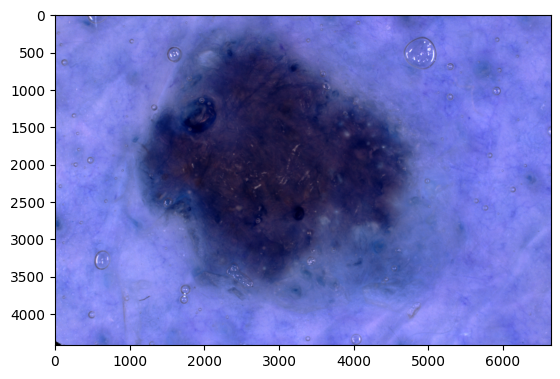

In [40]:
import matplotlib.pyplot as plt


# call imshow() using plt object
plt.imshow(img)

In [41]:
im_array=[]
for img in df_data.index:
  image=cv2.resize(cv2.imread("/content/drive/MyDrive/Advanced ML/Detecting Skin Lesions using Ensembles of Networks/Data files/2017/ISIC-2017_Training_Data/" + img + '.jpg'), (224, 224))
  im_array.append(image)
im_array = np.array(im_array)

In [68]:
im_array=[]
for img in df_val.index:
  #print(img)
  image=cv2.resize(cv2.imread("/content/drive/MyDrive/Advanced ML/Detecting Skin Lesions using Ensembles of Networks/Data files/2017/ISIC-2017_Validation_Data/" + img + '.jpg'), (224, 224))
  im_array.append(image)
im_array_val = np.array(im_array)

In [42]:
im_array = np.array(im_array)

In [43]:
im_array.shape

(2000, 224, 224, 3)

In [69]:
im_array_val.shape

(150, 224, 224, 3)

In [44]:
data=torch.from_numpy(im_array)
data

tensor([[[[197, 178, 163],
          [215, 183, 152],
          [202, 177, 155],
          ...,
          [238, 199, 164],
          [243, 197, 160],
          [225, 199, 174]],

         [[209, 171, 150],
          [225, 173, 137],
          [225, 180, 150],
          ...,
          [254, 203, 149],
          [255, 202, 145],
          [234, 194, 151]],

         [[210, 179, 150],
          [229, 184, 138],
          [225, 186, 148],
          ...,
          [250, 201, 151],
          [251, 197, 147],
          [230, 194, 157]],

         ...,

         [[232, 200, 168],
          [252, 202, 161],
          [245, 208, 162],
          ...,
          [253, 229, 177],
          [254, 228, 177],
          [248, 223, 191]],

         [[236, 196, 160],
          [252, 200, 154],
          [248, 206, 154],
          ...,
          [254, 227, 175],
          [254, 225, 171],
          [253, 223, 183]],

         [[219, 193, 179],
          [242, 199, 174],
          [229, 199, 168],
         

In [103]:
data_val=torch.from_numpy(im_array_val)
data_val

tensor([[[[ 80, 108, 139],
          [ 76, 100, 130],
          [ 80, 107, 133],
          ...,
          [108, 127, 154],
          [110, 130, 157],
          [112, 134, 159]],

         [[ 77, 105, 139],
          [ 84, 103, 126],
          [ 86, 113, 144],
          ...,
          [106, 128, 154],
          [112, 132, 157],
          [114, 134, 159]],

         [[ 81, 108, 134],
          [ 81, 104, 130],
          [ 85, 111, 141],
          ...,
          [103, 123, 154],
          [110, 130, 155],
          [113, 133, 158]],

         ...,

         [[110, 126, 149],
          [108, 126, 149],
          [106, 125, 150],
          ...,
          [120, 133, 155],
          [123, 134, 156],
          [115, 129, 148]],

         [[109, 123, 146],
          [107, 125, 148],
          [108, 126, 148],
          ...,
          [122, 135, 156],
          [115, 132, 153],
          [114, 124, 142]],

         [[108, 124, 147],
          [110, 126, 149],
          [113, 127, 150],
         

In [45]:
image=tf.divide(data, 255)
#

In [104]:
image_val=tf.divide(data_val, 255)

In [46]:
image=tf.image.resize(image, [28,28])

In [105]:
image_val=tf.image.resize(image_val, [28,28])

In [47]:
image=tf.image.random_flip_left_right(image)
image=tf.image.random_flip_up_down(image)
image=tf.image.random_brightness(image, max_delta=0.5)
image=tf.image.random_contrast(image, lower=0.2, upper=1.8)
image=tf.image.random_hue(image, max_delta=0.2)
image=tf.image.random_saturation(image, lower=0.2, upper=1.8)

In [106]:
image_val=tf.image.random_flip_left_right(image_val)
image_val=tf.image.random_flip_up_down(image_val)
image_val=tf.image.random_brightness(image_val, max_delta=0.5)
image_val=tf.image.random_contrast(image_val, lower=0.2, upper=1.8)
image_val=tf.image.random_hue(image_val, max_delta=0.2)
image_val=tf.image.random_saturation(image_val, lower=0.2, upper=1.8)

In [48]:
def activation_normalization_layer(x):
    """
    x: input tensor
    """
    x=keras.layers.Activation('gelu')(x)
    x=keras.layers.BatchNormalization()(x)
    return x




#This function creates the patch embeddings
def patch_conv_layer(x, filters, patch_size):
    """
    x: input tensor
    filters: number of filters or hidden dimension
    patch_size: the patch size which in this case determines the kernel size and stride
    """
    x=keras.layers.Conv2D(filters=filters, kernel_size=patch_size, strides=patch_size)(x)
    x=activation_normalization_layer(x)
    return x




#This is the main ConvMixer layer which is repeated "depth" times
def conv_mixer_layer(x, filters, kernel_size):
    """
    x: input tensor
    filters: number of filters or hidden dimension
    kernel_size: the kernel size
    """
    #residual depthwise convolution
    initial=x
    x=keras.layers.DepthwiseConv2D(kernel_size=kernel_size, padding="same")(x)
    x=activation_normalization_layer(x)
    x=keras.layers.Concatenate()([x, initial])

    #pointwise convolution 1x1
    x=keras.layers.Conv2D(filters=filters, kernel_size=1, padding="same")(x) #1x1 because pointwise
    x=activation_normalization_layer(x)

    return


In [49]:
image_size=28
filters=256
depth=8
kernel_size=5
patch_size=2
num_classes=18

In [50]:
x=keras.layers.Conv2D(filters=filters, kernel_size=patch_size, strides=patch_size)(image)
x

<tf.Tensor: shape=(2000, 14, 14, 256), dtype=float32, numpy=
array([[[[ 0.08964556, -0.07316949, -0.20281205, ..., -0.19935344,
          -0.12520131, -0.0296571 ],
         [ 0.08999912, -0.07248449, -0.20388521, ..., -0.19891647,
          -0.12622121, -0.02942579],
         [ 0.08954443, -0.07183425, -0.20407432, ..., -0.20039529,
          -0.12541445, -0.03084356],
         ...,
         [ 0.08995819, -0.07214525, -0.2044155 , ..., -0.20145331,
          -0.12571424, -0.03095978],
         [ 0.09024904, -0.07203078, -0.20509885, ..., -0.20266058,
          -0.12586494, -0.03118907],
         [ 0.09058732, -0.07183353, -0.20501548, ..., -0.203066  ,
          -0.12579706, -0.03083599]],

        [[ 0.08864743, -0.07146139, -0.2043454 , ..., -0.20001048,
          -0.12490711, -0.03059098],
         [ 0.09008746, -0.07262608, -0.20391159, ..., -0.2009389 ,
          -0.12602586, -0.03071798],
         [ 0.08844367, -0.07236955, -0.20331521, ..., -0.20004748,
          -0.12454344, -

In [107]:
x_val=keras.layers.Conv2D(filters=filters, kernel_size=patch_size, strides=patch_size)(image_val)
x_val

<tf.Tensor: shape=(150, 14, 14, 256), dtype=float32, numpy=
array([[[[ 0.00588402,  0.07480641, -0.1348118 , ...,  0.08837428,
           0.1514197 ,  0.03845574],
         [ 0.01078583,  0.0736854 , -0.13456549, ...,  0.08879932,
           0.15455303,  0.03947935],
         [-0.0121614 ,  0.01485272, -0.1454144 , ...,  0.0154878 ,
           0.1747078 , -0.00219716],
         ...,
         [ 0.0100223 ,  0.08426376, -0.1460696 , ...,  0.08975929,
           0.1717367 ,  0.039127  ],
         [ 0.01052768,  0.07653523, -0.13713413, ...,  0.08743846,
           0.15858033,  0.04580719],
         [ 0.00740134,  0.07425026, -0.13378085, ...,  0.08337559,
           0.1590085 ,  0.03694886]],

        [[ 0.00940199,  0.08070751, -0.14345461, ...,  0.09086213,
           0.16629475,  0.03795912],
         [ 0.01142396,  0.07991631, -0.1419028 , ...,  0.08768935,
           0.16591893,  0.04271575],
         [ 0.01301006,  0.08043856, -0.14283247, ...,  0.07485258,
           0.16685559,  0

In [51]:
x=activation_normalization_layer(x)


In [108]:
x_val=activation_normalization_layer(x_val)

In [52]:
for y in range(8):
    print(y)
    initial=x
    x=keras.layers.DepthwiseConv2D(kernel_size=kernel_size, padding="same")(x)
    x=activation_normalization_layer(x)
    x=keras.layers.Concatenate()([x, initial])
    x=keras.layers.Conv2D(filters=filters, kernel_size=1, padding="same")(x) #1x1 because pointwise
    x=activation_normalization_layer(x)

0
1
2
3
4
5
6
7


In [109]:
for y in range(8):
    print(y)
    initial=x_val
    x_val=keras.layers.DepthwiseConv2D(kernel_size=kernel_size, padding="same")(x_val)
    x_val=activation_normalization_layer(x_val)
    x_val=keras.layers.Concatenate()([x_val, initial])
    x_val=keras.layers.Conv2D(filters=filters, kernel_size=1, padding="same")(x_val) #1x1 because pointwise
    x_val=activation_normalization_layer(x_val)

0
1
2
3
4
5
6
7


In [53]:
x

<tf.Tensor: shape=(2000, 14, 14, 256), dtype=float32, numpy=
array([[[[-1.43918769e-05, -5.18884335e-05,  2.91666838e-05, ...,
          -4.09229724e-05, -7.26753933e-05,  6.83879043e-05],
         [-1.67937051e-05, -5.50478399e-05,  3.11281801e-05, ...,
          -3.93616574e-05, -7.15416463e-05,  7.13361005e-05],
         [-1.77910370e-05, -5.57944913e-05,  3.38841019e-05, ...,
          -4.16209878e-05, -6.88180880e-05,  7.12127876e-05],
         ...,
         [-1.78862865e-05, -5.59382606e-05,  3.40739134e-05, ...,
          -4.16254188e-05, -6.90039524e-05,  7.14231428e-05],
         [-1.76725116e-05, -5.90190903e-05,  3.58514953e-05, ...,
          -4.34446229e-05, -7.05374259e-05,  7.26963553e-05],
         [-1.62955548e-05, -5.90061172e-05,  3.22328015e-05, ...,
          -4.34961694e-05, -6.85471823e-05,  7.09057276e-05]],

        [[-1.77260499e-05, -5.43212482e-05,  2.93631474e-05, ...,
          -4.14962487e-05, -7.36093571e-05,  6.78426295e-05],
         [-1.87366932e-05, 

In [54]:
# importing modules
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [55]:
x=Flatten(input_shape=(14,14,256))(x)

In [110]:
x_val=Flatten(input_shape=(14,14,256))(x_val)

In [56]:
x=Dense(256, activation='sigmoid')(x)

In [111]:
x_val=Dense(256, activation='sigmoid')(x_val)

In [57]:
x

<tf.Tensor: shape=(2000, 256), dtype=float32, numpy=
array([[0.49996558, 0.49999586, 0.49998266, ..., 0.50004286, 0.49998757,
        0.499986  ],
       [0.4999604 , 0.4999941 , 0.4999802 , ..., 0.5000443 , 0.49998477,
        0.499985  ],
       [0.49996477, 0.49999377, 0.4999796 , ..., 0.5000437 , 0.49999127,
        0.49998417],
       ...,
       [0.49996156, 0.49999866, 0.49998233, ..., 0.500042  , 0.49998352,
        0.499989  ],
       [0.49996588, 0.49999902, 0.49998125, ..., 0.500037  , 0.4999872 ,
        0.4999896 ],
       [0.4999675 , 0.49999896, 0.49998406, ..., 0.50003475, 0.49998483,
        0.49998987]], dtype=float32)>

In [58]:
convmixer=x

In [112]:
convmixer_val=x_val

In [60]:
x.shape

TensorShape([2000, 256])

In [83]:
rand_state=52
val=True

In [59]:
convmixer=convmixer.numpy()
convmixer

array([[0.49996558, 0.49999586, 0.49998266, ..., 0.50004286, 0.49998757,
        0.499986  ],
       [0.4999604 , 0.4999941 , 0.4999802 , ..., 0.5000443 , 0.49998477,
        0.499985  ],
       [0.49996477, 0.49999377, 0.4999796 , ..., 0.5000437 , 0.49999127,
        0.49998417],
       ...,
       [0.49996156, 0.49999866, 0.49998233, ..., 0.500042  , 0.49998352,
        0.499989  ],
       [0.49996588, 0.49999902, 0.49998125, ..., 0.500037  , 0.4999872 ,
        0.4999896 ],
       [0.4999675 , 0.49999896, 0.49998406, ..., 0.50003475, 0.49998483,
        0.49998987]], dtype=float32)

In [113]:
convmixer_val=convmixer_val.numpy()
convmixer_val

array([[0.5000215 , 0.49998483, 0.5000182 , ..., 0.49999604, 0.49998298,
        0.49998918],
       [0.50001866, 0.49999195, 0.50001365, ..., 0.49999744, 0.49997854,
        0.4999899 ],
       [0.5000141 , 0.4999998 , 0.50003   , ..., 0.5000012 , 0.4999813 ,
        0.49999586],
       ...,
       [0.5000214 , 0.4999973 , 0.5000145 , ..., 0.4999918 , 0.49998966,
        0.49999088],
       [0.50002545, 0.49999824, 0.5000195 , ..., 0.4999942 , 0.49998376,
        0.49998832],
       [0.50001895, 0.49999186, 0.5000159 , ..., 0.49999562, 0.49998543,
        0.49999198]], dtype=float32)

In [121]:
x_val1.shape

(150, 11)

In [120]:
convmixer_val.shape

(150, 256)

In [61]:
x_train=np.concatenate([x_train,convmixer],axis=1)

In [122]:
x_val1=np.concatenate([x_val1,convmixer_val],axis=1)

In [62]:
x_train.shape

(2000, 267)

In [67]:
pd.DataFrame(x_train, index=df_data.index).to_csv('/content/drive/MyDrive/Advanced ML/Detecting Skin Lesions using Ensembles of Networks/Data files/2017/Train_conv.csv')

In [123]:
x_val1.shape

(150, 267)

In [125]:
pd.DataFrame(x_val1, index=df_val.index).to_csv('/content/drive/MyDrive/Advanced ML/Detecting Skin Lesions using Ensembles of Networks/Data files/2017/Val_conv.csv')

In [44]:
x_train=pd.read_csv('Train_conv.csv',index_col='Image')
x_train=np.array(x_train)
x_train

array([[0.6511628 , 1.        , 0.        , ..., 0.50004286, 0.49998757,
        0.499986  ],
       [0.3604651 , 1.        , 0.        , ..., 0.5000443 , 0.49998477,
        0.499985  ],
       [0.7093023 , 1.        , 0.        , ..., 0.5000437 , 0.49999127,
        0.49998417],
       ...,
       [0.6511628 , 1.        , 0.        , ..., 0.500042  , 0.49998352,
        0.499989  ],
       [0.88372093, 0.        , 1.        , ..., 0.500037  , 0.4999872 ,
        0.4999896 ],
       [0.8255814 , 0.        , 1.        , ..., 0.50003475, 0.49998483,
        0.49998987]])

In [46]:
u, count = np.unique(y_train,return_counts=True)

In [47]:
count_sort_ind = np.argsort(-count)

In [48]:
y_train_unique_top34=u[count_sort_ind[0:18]]

In [49]:
x_top34=[]
y_top34=[]
sample_size=[]

In [50]:
for j, sample_label in enumerate(y_train_unique_top34):
        sample_index=np.argwhere(y_train==sample_label)[:,0]
        sample_size.append(sample_index.shape)
        x_top34.append(x_train[sample_index])
        temp_y=y_train[sample_index]
        temp_y[temp_y == sample_label] = j
        y_top34.append(temp_y)

In [51]:
sample_size

[(1372,), (374,), (254,)]

In [52]:
y_top34

[array([0, 0, 0, ..., 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     

In [53]:
X_train=[]
X_test=[]
y_train=[]
y_test=[]

In [54]:
rand_state=52
val=True

In [55]:
for d in range(len(x_top34)):
    x_train, x_test, y_tr, y_te = train_test_split(x_top34[d], y_top34[d], test_size=0.2,
                                                            random_state=rand_state)

    X_train.append(x_train)
    X_test.append(x_test)
    y_train.append(y_tr)
    y_test.append(y_te)

In [57]:
if val==True:
    X_train_val = []
    X_val = []
    y_train_val = []
    y_val = []
    for dd in range(len(x_top34)):
        x_train_val, x_val, y_tr_val, y_va = train_test_split(X_train[dd], y_train[dd], test_size=0.1,
                                                           random_state=rand_state)
        X_train_val.append(x_train_val)
        X_val.append(x_val)
        y_train_val.append(y_tr_val)
        y_val.append(y_va)

    X_train=X_train_val
    y_train=y_train_val
    X_val_input=torch.from_numpy(np.vstack(X_val))
    y_val_input=torch.from_numpy(np.hstack(y_val))

In [58]:
X_train_input=torch.from_numpy(np.vstack(X_train))
X_test_input=torch.from_numpy(np.vstack(X_test))
y_train_input=torch.from_numpy(np.hstack(y_train))
y_test_input=torch.from_numpy(np.hstack(y_test))

In [59]:
#Use this line only if you use gpu
torch.set_num_threads(10)

In [43]:
y_train=pd.read_csv('Train_label_conv.csv',index_col='Image')
y_train=np.array(y_train['0'])
y_train

array([0, 0, 1, ..., 2, 1, 2])

In [7]:
x_val=pd.read_csv('Val_conv.csv',index_col='Image')
x_val=np.array(x_val)
x_val

array([[0.18604651, 1.        , 0.        , ..., 0.49999604, 0.49998298,
        0.49998918],
       [0.12790698, 1.        , 0.        , ..., 0.49999744, 0.49997854,
        0.4999899 ],
       [0.18604651, 0.        , 1.        , ..., 0.5000012 , 0.4999813 ,
        0.49999586],
       ...,
       [0.59302324, 0.        , 1.        , ..., 0.4999918 , 0.49998966,
        0.49999088],
       [0.24418604, 1.        , 0.        , ..., 0.4999942 , 0.49998376,
        0.49998832],
       [0.18604651, 1.        , 0.        , ..., 0.49999562, 0.49998543,
        0.49999198]])

In [14]:
y_val=pd.read_csv('Val_label_conv.csv',index_col='Image')
y_val=np.array(y_val['0'])
y_val

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0,
       0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=52)

In [16]:
x_val, y_val = shuffle(x_val, y_val, random_state=52)

In [141]:
#x_test, y_test = shuffle(x_test, y_test ,random_state=52)


In [17]:
X_train_input=torch.from_numpy(np.vstack(x_train))
#X_test_input=torch.from_numpy(np.vstack(x_test))
X_val_input=torch.from_numpy(np.vstack(x_val))
y_train_input=torch.from_numpy(np.hstack(y_train))
#y_test_input=torch.from_numpy(np.hstack(y_test))
y_val_input=torch.from_numpy(np.hstack(y_val))

In [18]:
#Use this line only if you use gpu
torch.set_num_threads(10)

In [236]:
#Setting the parameters
head_num=None
learning_rate=0.01
dropout_rate=0.1
act_fun='nan' #can choose between relu, leakyrelu, or gelu, if you don't want to use an act funct. use nan
rand_seed=52
batch_size=64
epoch=100
do_val=True
result_dir='./res/'
model_dir='./model/'

In [237]:
#If directories are not defined, it creates them
if not os.path.exists(result_dir):
    os.makedirs(result_dir,exist_ok=True)
if not os.path.exists(model_dir):
    os.makedirs(model_dir, exist_ok=True)
if not os.path.exists(result_dir+'/model_figure'):
    os.makedirs(result_dir+'/model_figure/', exist_ok=True)

In [238]:
len(X_train_input[0])

267

In [239]:
d_ff = 1024
dropout_rate = dropout_rate
n_epochs = epoch
batch_size = batch_size
n_head = head_num
lr_rate=learning_rate
act_fun=act_fun
gain=1

rand_state=rand_seed
n_gene = 267
n_feature = 267
n_class = 3
query_gene = 64 # not using but cannot delete
val = do_val

# save_memory=True
save_memory = False
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [240]:
import torch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

In [241]:
#Start defining the multiattention layer
class mulitiattention(torch.nn.Module):
    def __init__(self, batch_size,n_head,n_gene,n_feature,query_gene,mode):
        super(mulitiattention, self).__init__()
        self.n_head=n_head
        self.n_gene = n_gene
        self.batch_size=batch_size
        self.n_feature=n_feature
        self.mode=mode
        self.query_gene=query_gene

        self.WQ = nn.Parameter(torch.Tensor(self.n_head, n_feature, 1), requires_grad=True)
        #print('WQ',self.WQ.detach().numpy().reshape(231,3))
        self.WK = nn.Parameter(torch.Tensor(self.n_head,n_feature,1),requires_grad=True)
        #print('WK',self.WK.detach().numpy().reshape(231,3))
        self.WV = nn.Parameter(torch.Tensor(self.n_head,n_feature,1),requires_grad=True)
        #print('WV',self.WV.detach().numpy().reshape(231,3))
        torch.nn.init.xavier_normal_(self.WQ,gain=1)
        torch.nn.init.xavier_normal_(self.WK,gain=1)
        torch.nn.init.xavier_normal_(self.WV)
        #print('WQinit',self.WQ.detach().numpy().reshape(231,3))
        #print('WKinit',self.WK.detach().numpy().reshape(231,3))
        #print('WVinit',self.WV.detach().numpy().reshape(231,3))

        self.W_0=nn.Parameter(torch.Tensor(self.n_head*[0.001]),requires_grad=True)
        #print('W_0',self.W_0)
        #print('init')

#Define the query and values
    def QK_diff(self,Q_seq, K_seq):
        QK_dif = -1 * torch.pow((Q_seq - K_seq),2)
        return torch.nn.Softmax(dim=2)(QK_dif)

    def mask_softmax_self(self,x):
        d=x.shape[1]
        x = x *((1 - torch.eye(d, d)).to(device))
        return x

    #Define the attention layer
    def attention(self,x,Q_seq,WK,WV):
        if self.mode == 0:
            #print('start')
            #print('x',x[0].cpu().detach().numpy().reshape(231))
            #print('WK_attention',WK.cpu().detach().numpy().reshape(231))
            K_seq = x * WK
            K_seq = K_seq.expand(K_seq.shape[0], K_seq.shape[1], self.n_gene)
            K_seq = K_seq.permute(0, 2, 1)
            #print('K_seq=X*W',K_seq[0].shape)
            V_seq = x * WV
            #print('x',x[0].cpu().detach().numpy().reshape(231))
            #print('WV',WV.cpu().detach().numpy().reshape(231))
            #print('V_seq=x*WV',V_seq[0].cpu().detach().numpy().reshape(231))
            QK_product = Q_seq * K_seq
            #print('Q_seq',Q_seq[0])
           # print('K_seq',K_seq[0])
            #print('QK_product',QK_product[0].shape)
            z=torch.nn.Softmax(dim=2)(QK_product)
            #print('z1(softmax)',z[0])

            z=self.mask_softmax_self(z)
            #print('z(softmax)',z[0].shape)
            out_seq=torch.matmul(z, V_seq)
            #print('value by z',out_seq[0].cpu().detach().numpy().reshape(231))

        return out_seq
    #Define the feed forward after attention
    def forward(self, x):

        x = torch.reshape(x, (x.shape[0], x.shape[1], 1))
        out_h = []
        for h in range(self.n_head):
            #print('for head number ', h)
            Q_seq = x * self.WQ[h,:,:]
            #print('WQ',self.WQ.cpu().detach().numpy().reshape(231,3))
            #print('Q_seq',self.Q_seq)
            Q_seq = Q_seq.expand(Q_seq.shape[0], Q_seq.shape[1], self.n_gene)
            #print('Q_seq1',self.Q_seq)
            if save_memory:
                attention_out=cp(self.attention,x, Q_seq, self.WK[h,:,:], self.WV[h,:,:])
            else:
                attention_out=self.attention(x, Q_seq, self.WK[h,:,:], self.WV[h,:,:])
                #print('attention_out',attention_out[0])

            out_h.append(attention_out)
        out_seq=torch.cat(out_h,dim=2)
        out_seq=torch.matmul(out_seq,self.W_0)
        return out_seq

In [242]:
#Layer normalization
class layernorm(nn.Module):
    def __init__(self, features, eps=1e-6):
        super(layernorm, self).__init__()
        self.a_2 = nn.Parameter(torch.ones(features))
        self.b_2 = nn.Parameter(torch.zeros(features))
        self.eps = eps

    def forward(self, x):
        mean = x.mean(-1, keepdim=True)
        std = x.std(-1, keepdim=True)
        return self.a_2 * (x - mean) / (std + self.eps) + self.b_2

In [243]:
class res_connect(nn.Module):

##########    A residual connection followed by a layer norm.

    def __init__(self, size, dropout):
        super(res_connect, self).__init__()
        self.norm = layernorm(size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, out):
        ###Apply residual connection to any sublayer with the same size
        return x + self.norm(self.dropout(out))

In [244]:
#Define the model
class MyNet(torch.nn.Module):
    def __init__(self, batch_size,n_head,n_gene,n_feature,n_class,query_gene,d_ff,dropout_rate,mode):
        super(MyNet, self).__init__()
        self.n_head=n_head
        self.n_gene = n_gene
        self.batch_size=batch_size
        self.n_feature=n_feature
        self.n_class=n_class
        self.d_ff=d_ff
        self.mulitiattention1=mulitiattention(self.batch_size,self.n_head,self.n_gene,self.n_feature,query_gene,mode)
        self.mulitiattention2 = mulitiattention(self.batch_size, self.n_head, self.n_gene, self.n_feature, query_gene,
                                               mode)
        self.mulitiattention3 = mulitiattention(self.batch_size, self.n_head, self.n_gene, self.n_feature, query_gene,
                                               mode)
        self.fc = nn.Linear(self.n_gene, self.n_class)
        torch.nn.init.xavier_uniform_(self.fc.weight,gain=1)
        self.ffn1=nn.Linear(self.n_gene, self.d_ff)
        self.ffn2 = nn.Linear(self.d_ff,self.n_gene)
        self.dropout=nn.Dropout(dropout_rate)
        self.sublayer=res_connect(n_gene,dropout_rate)

    def feedforward(self,x):
        out=F.relu(self.ffn1(x))
        out=self.ffn2(self.dropout(out))
        return out

    def forward(self, x):

        out_attn= self.mulitiattention1(x)
        out_attn_1=self.sublayer(x,out_attn)
        out_attn_2 = self.mulitiattention2(out_attn_1)
        out_attn_2=self.sublayer(out_attn_1,out_attn_2)
        out_attn_3 = self.mulitiattention3(out_attn_2)
        out_attn_3=self.sublayer(out_attn_2,out_attn_3)
        if act_fun=='relu':
            out_attn_3=F.relu(out_attn_3)
        if act_fun=='leakyrelu':
            m=torch.nn.LeakyReLU(0.1)
            out_attn_3=m(out_attn_3)
        if act_fun=='gelu':
            m = torch.nn.GELU()
            out_attn_3=m(out_attn_3)
        y_pred = self.fc(out_attn_3)
        y_pred=F.log_softmax(y_pred, dim=1)

        return y_pred


In [245]:
#Run the model
model=MyNet(batch_size,3,n_gene,n_feature,n_class,query_gene,d_ff,dropout_rate,mode=0).to(device) # mode 1 is not working right now.
optimizer =torch.optim.Adam(model.parameters(), lr=lr_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

In [246]:
train_loss_list=[]
train_acc_res=[]
val_loss_list=[]
res={}
confusion_matrix_res=[]
mcc_res=[]
acc_res=[]
auc_res=[]
f1_res=[]
val_acc_res = []
val_loss_res = []
train_auc_res = []
val_auc_res = []
for epoch in range(n_epochs):
    train_loss=0
    permutation = torch.randperm(X_train_input.size()[0])
    #print(permutation)
    # torch.cuda.empty_cache()
    n_correct, n_total = 0, 0
    for batch_idx,i in enumerate(range(0, X_train_input.size()[0], batch_size)):
        model.train()
        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_train_input[indices], y_train_input[indices]
        batch_x, batch_y=batch_x.to(device), batch_y.to(device)

        optimizer.zero_grad()

        y_pred = model(batch_x.float())

        loss = F.nll_loss(y_pred, batch_y)
        loss.backward()
        optimizer.step()

        train_loss+=loss.item()

        pred_train = y_pred.argmax(dim=1, keepdim=True)
        n_correct += pred_train.eq(batch_y.view_as(pred_train)).sum().item()
        n_total += batch_y.size(0)


    train_loss /= len(X_train_input)
    print('train_loss',train_loss)
    train_loss_list.append(train_loss)
    train_accuracy = n_correct / n_total
    train_acc_res.append(train_accuracy)
    
    # Calculate AUC for training
    y_train_bin = LabelBinarizer().fit_transform(y_train_input.cpu().numpy())
    y_pred_train_proba = F.softmax(model(X_train_input.float().to(device)), dim=1).cpu().data.numpy()
    train_auc = roc_auc_score(y_train_bin, y_pred_train_proba, multi_class='ovr', average='micro')
    train_auc_res.append(train_auc)

    if val==True:
        model.eval()
        permutation_val = torch.randperm(X_val_input.size()[0])
        correct_val=0
        val_loss = 0
        with torch.no_grad():
            batch_pred=[]
            batch_y_val_list=[]
            batch_pred_cate=[]

            for batch_idx_val, i in enumerate(range(0, X_val_input.size()[0], batch_size)):
                indices_val = permutation_val[i:i + batch_size]
                batch_x_val, batch_y_val = X_val_input[indices_val], y_val_input[indices_val]
                batch_x_val, batch_y_val = batch_x_val.to(device), batch_y_val.to(device)

                output_val = model(batch_x_val.float())
                val_loss += F.nll_loss(output_val, batch_y_val, reduction='sum')
                pred_val = output_val.argmax(dim=1, keepdim=True)

                correct_val += pred_val.eq(batch_y_val.view_as(pred_val)).sum().item()
                batch_pred.append(pred_val.cpu().data.numpy())
                batch_y_val_list.append(batch_y_val.cpu().data.numpy())
                batch_pred_cate.append(output_val.cpu().data.numpy())

            val_loss /= len(X_val_input)

            val_loss_list.append(val_loss.item())
            
            val_accuracy = correct_val / len(X_val_input)
            val_acc_res.append(val_accuracy)

            print('\nval set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
                val_loss, correct_val, len(X_val_input),
                100. * correct_val / len(X_val_input)))
            
            

            yy_val=np.hstack(batch_y_val_list).reshape(-1,1)
            ppred_classes=np.vstack(batch_pred)

            val_acc_val = accuracy_score(yy_val, ppred_classes)
            f1 = f1_score(yy_val, ppred_classes, average='micro')


            confusion_mat = metrics.confusion_matrix(yy_val, ppred_classes)
            mcc=metrics.matthews_corrcoef(yy_val, ppred_classes)

            encoder_ = LabelBinarizer()
            yy_val_ = encoder_.fit_transform(yy_val)
            roc_auc = metrics.roc_auc_score(yy_val_, np.exp(np.vstack(batch_pred_cate)), multi_class='ovr', average='micro')

            # Calculate AUC for validation
            y_val_bin = LabelBinarizer().fit_transform(yy_val)
            y_pred_val_proba = np.exp(np.vstack(batch_pred_cate))
            val_auc = roc_auc_score(y_val_bin, y_pred_val_proba, multi_class='ovr', average='micro')
            val_auc_res.append(val_auc)
            
    confusion_matrix_res.append(confusion_mat)
    mcc_res.append(mcc)
    acc_res.append(acc_val)
    auc_res.append(roc_auc)
    f1_res.append(f1)

    torch.save(model, model_dir+ '/pytorch_transformer_head_' + str(n_head) + '_lr_' + str(lr_rate) + '_' + str(act_fun) +'_epoch'+str(epoch)+'.model')
res['confusion_matrix'] = confusion_matrix_res
res['mcc'] = mcc_res
res['f1'] = f1_res
res['acc'] = acc_res
res['auc'] = auc_res


pl.dump(res, open(result_dir+'/pytorch_transformer_head_' + str(n_head) + '_lr_' + str(lr_rate) + '_' + str(act_fun) +'.dat', 'wb'))
plt.plot(train_loss_list,label='train loss')
plt.plot(val_loss_list,label='val loss')
plt.legend()
plt.savefig(result_dir+'/model_figure/pytorch_transformer_head_'+str(n_head)+'_lr_' + str(lr_rate) + '_' + str(act_fun) +'.png',format='png')
plt.close()

train_loss 0.02645737687138755

val set: Average loss: 1.9315, Accuracy: 30/161 (18.63%)

train_loss 0.018482010785661255

val set: Average loss: 0.8466, Accuracy: 110/161 (68.32%)

train_loss 0.015974116632106076

val set: Average loss: 0.8991, Accuracy: 110/161 (68.32%)

train_loss 0.014927861214678874

val set: Average loss: 0.8388, Accuracy: 110/161 (68.32%)

train_loss 0.014591491686618047

val set: Average loss: 0.8439, Accuracy: 110/161 (68.32%)

train_loss 0.013916577019512405

val set: Average loss: 0.8696, Accuracy: 110/161 (68.32%)

train_loss 0.014225923260660928

val set: Average loss: 0.7973, Accuracy: 110/161 (68.32%)

train_loss 0.014454459323339237

val set: Average loss: 0.7783, Accuracy: 110/161 (68.32%)

train_loss 0.013758128309448836

val set: Average loss: 0.8372, Accuracy: 106/161 (65.84%)

train_loss 0.01395195092544768

val set: Average loss: 0.7450, Accuracy: 108/161 (67.08%)

train_loss 0.013636503539596048

val set: Average loss: 1.1572, Accuracy: 68/161 (4

train_loss 0.01098588272742668

val set: Average loss: 0.6586, Accuracy: 109/161 (67.70%)

train_loss 0.010697958946891222

val set: Average loss: 0.6755, Accuracy: 112/161 (69.57%)

train_loss 0.010551455330948173

val set: Average loss: 0.6545, Accuracy: 117/161 (72.67%)

train_loss 0.010540256745626267

val set: Average loss: 0.6518, Accuracy: 112/161 (69.57%)

train_loss 0.01067883754472905

val set: Average loss: 0.6450, Accuracy: 113/161 (70.19%)

train_loss 0.010800386047164323

val set: Average loss: 0.6570, Accuracy: 116/161 (72.05%)

train_loss 0.010367097957409473

val set: Average loss: 0.6615, Accuracy: 113/161 (70.19%)

train_loss 0.010522799962750727

val set: Average loss: 0.6662, Accuracy: 115/161 (71.43%)

train_loss 0.010541069491019003

val set: Average loss: 0.6523, Accuracy: 113/161 (70.19%)

train_loss 0.010496867444982782

val set: Average loss: 0.6562, Accuracy: 113/161 (70.19%)



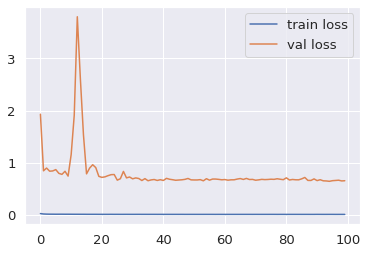

In [247]:
pl.dump(res, open(result_dir+'/pytorch_transformer_head_' + str(n_head) + '_lr_' + str(lr_rate) + '_' + str(act_fun) +'.dat', 'wb'))
plt.plot(train_loss_list,label='train loss')
plt.plot(val_loss_list,label='val loss')
plt.legend()

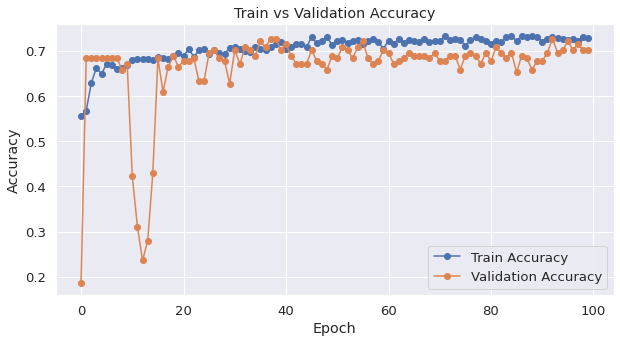

In [248]:
# Plot train vs validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc_res, label='Train Accuracy', marker='o')
plt.plot(val_acc_res, label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.savefig(result_dir + '/model_figure/train_vs_val_accuracy2.png', format='png')
plt.show()

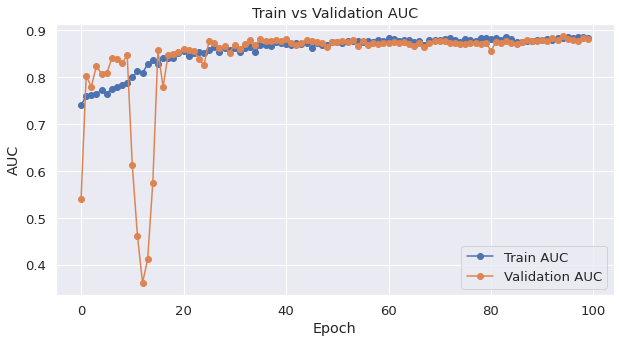

In [249]:
# Plot train vs validation AUC
plt.figure(figsize=(10, 5))
plt.plot(train_auc_res, label='Train AUC', marker='o')
plt.plot(val_auc_res, label='Validation AUC', marker='o')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.title('Train vs Validation AUC')
plt.legend()
plt.grid(True)
plt.savefig(result_dir + '/model_figure/train_vs_val_auc.png', format='png')
plt.show()

In [195]:
batch_pred=[]
batch_y_val_list=[]
batch_pred_cate=[]
permutation = torch.randperm(X_test_input.size()[0])
for batch_idx_val, i in enumerate(range(0, X_test_input.size()[0], 128)):
    indices_val = permutation[i:i + batch_size]
    #print(indices_val)
    batch_x_val, batch_y_val = X_test_input[indices_val], y_test_input[indices_val]
    batch_x_val, batch_y_val = batch_x_val.to(device), batch_y_val.to(device)
    print(batch_y_val)

    output_val = model(batch_x_val.float())
    val_loss += F.nll_loss(output_val, batch_y_val, reduction='sum')
    pred_val = output_val.argmax(dim=1, keepdim=True)
    batch_pred.append(pred_val.cpu().data.numpy())
    batch_y_val_list.append(batch_y_val.cpu().data.numpy())
    batch_pred_cate.append(output_val.cpu().data.numpy())

tensor([2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0], device='cuda:0')
tensor([0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0], device='cuda:0')
tensor([2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1], device='cuda:0')
tensor([1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 1, 0], device='cuda:0')


In [196]:
yy_val=np.hstack(batch_y_val_list).reshape(-1,1)
ppred_classes=np.vstack(batch_pred)

In [197]:
acc_val = accuracy_score(yy_val, ppred_classes)

In [198]:
acc_val

0.7081339712918661

In [199]:
f1 = f1_score(yy_val, ppred_classes, average='micro')


confusion_mat = metrics.confusion_matrix(yy_val, ppred_classes)
mcc=metrics.matthews_corrcoef(yy_val, ppred_classes)

encoder_ = LabelBinarizer()
yy_val_ = encoder_.fit_transform(yy_val)

In [200]:
y1=pd.DataFrame(yy_val)
y1

,0
0,2
1,0
2,0
3,0
4,2
...,...
204,2
205,0
206,0
207,1


In [201]:
cm=pd.DataFrame(confusion_mat)
cm

,0,1,2
0,135,2,9
1,27,7,6
2,13,4,6


In [202]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import LabelBinarizer


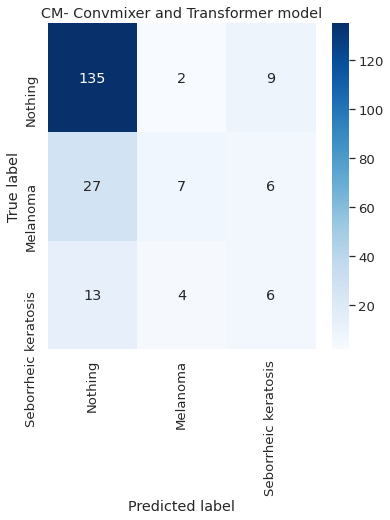

In [203]:
#cm = confusion_matrix(y_true, y_pred)
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", xticklabels=['Nothing','Melanoma','Seborrheic keratosis'], yticklabels=['Nothing','Melanoma','Seborrheic keratosis'])
plt.title('CM- Convmixer and Transformer model')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('CM-convmixer-transformer.png',dpi=300,bbox_inches = 'tight')

NameError: name 'val_acc_res' is not defined

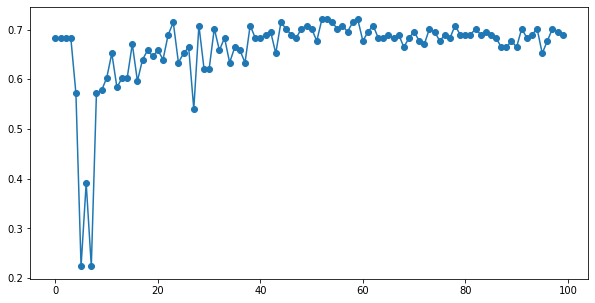

In [121]:
# Plot train vs validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(acc_res, label='Train Accuracy', marker='o')
plt.plot(val_acc_res, label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.grid(True)

Text(0.5, 1.0, 'Accuracy')

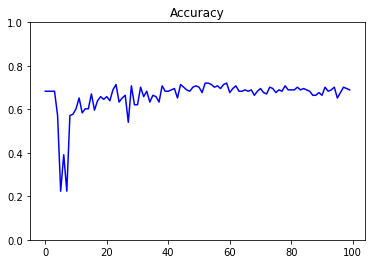

In [116]:
plt.plot(acc_res,  'b', label = 'Validation acc')
plt.ylim([0,1])
plt.title('Accuracy')

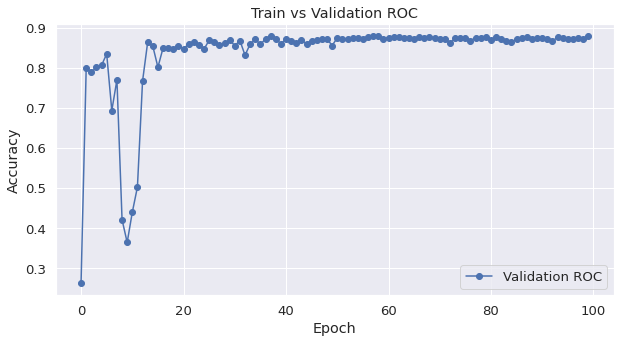

In [206]:
# Plot train vs validation accuracy
plt.figure(figsize=(10, 5))
#plt.plot(acc_res, label='Train Accuracy', marker='o')
plt.plot(res['auc'], label='Validation ROC', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation ROC')
plt.legend()
plt.grid(True)